In [1]:
## to build a simple recommender system
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import the dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/TMDb_updated.csv')

In [4]:
df.head()

,Unnamed: 0,title,overview,original_language,vote_count,vote_average
0,0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


In [5]:
# to remove the first column from dataset
df = df.drop('Unnamed: 0',axis=1)

In [6]:
df.head()

,title,overview,original_language,vote_count,vote_average
0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


In [7]:
# to check for missing values
df.isnull().sum()

title                 0
overview             30
original_language     0
vote_count            0
vote_average          0
dtype: int64

In [8]:
# to check for duplicated values
duplicates = df[df.duplicated()]

In [9]:
# there are no duplicated values
duplicates

,title,overview,original_language,vote_count,vote_average


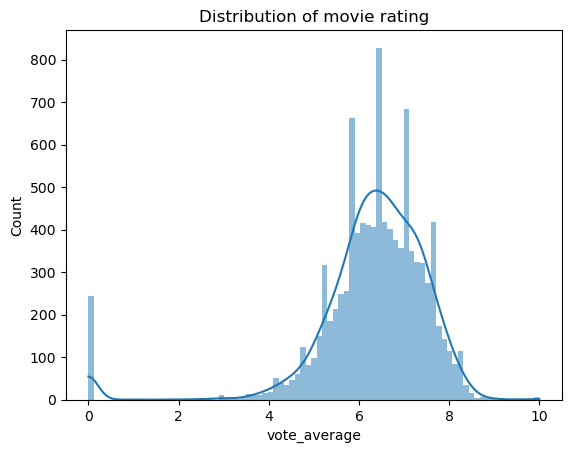

In [10]:
# to plot a distribution of movie rating
# average movie rating falls between 4.0 to 8.0
sns.histplot(data=df, x='vote_average', kde=True, edgecolor=None)
plt.title('Distribution of movie rating');

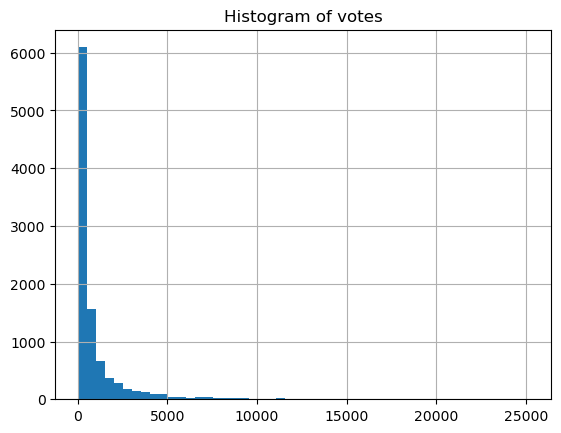

In [12]:
# to see the distribution of 'vote_count'
df['vote_count'].hist(bins=50)
plt.title('Histogram of votes');

In [13]:
# Exploratory Data analysis (EDA)
# to print movie titles & its average ratings
df.groupby('title')['vote_average'].mean().sort_values(ascending=False).head(10)

title
Four Kids and It            10.0
Mamu (and a Mother Too)     10.0
Gully                       10.0
You're Bacon Me Crazy       10.0
Prostitution                10.0
The Water Monster           10.0
Erotica:  Moonlight          9.8
Bulletproof 2                9.5
Kinky Boots: The Musical     9.2
Sub Rosa                     9.0
Name: vote_average, dtype: float64

In [17]:
df.groupby('title')['vote_count'].count().sort_values(ascending=False).head(10)

title
Beauty and the Beast    4
Dracula                 4
The Party               3
Les Misérables          3
The Kid                 3
Fallen                  3
The Mummy               3
Carrie                  3
The Cave                3
Robin Hood              3
Name: vote_count, dtype: int64

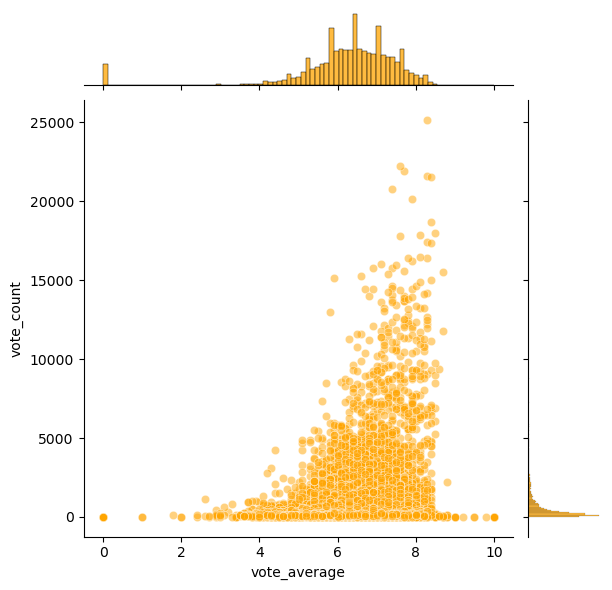

In [19]:
# to plot a joint plot of 'vote_count' & 'vote_average'
sns.jointplot(data=df, x='vote_average', y='vote_count', color='orange', alpha=0.5);

In [20]:
# to calculate the mean of the vote average column
# the average rating of a movie on IMDB is about 6.3 on a scale of 10
C = df['vote_average'].mean()
C

6.306229999999999

In [21]:
# to calculate the number of votes received by movie in the 90th percentile using the .quantile() method
# 2555 is the minimum number of votes required to be in the chart
m = df['vote_count'].quantile(0.9)
m

2555.0

In [22]:
# to filter out movies having greater than equal to 2555 vote counts
# to create a copy of df dataframe using the copy() method
# it uses the loc method to select rows where the value in the vote_count is >= m and assigning it to new df: q_movies
q_movies = df.copy().loc[df['vote_count']>=m]
q_movies.shape

(1001, 5)

In [23]:
# q_movies, there are around 10% movies with vote count more than 2555 and qualified to be on the list
df.shape

(10000, 5)

In [24]:
# most important step: to calculate the weighted rating for each qualified movie
# Define a function, weighted_rating():
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
      # Calculation based on the IMDB formula
    return (v/(v+m)* R) + (m/(m+v) * C)

In [25]:
# to define a new feature 'score' and calculate its value with 'weighted rating'
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [26]:
# to sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

In [27]:
# to print top 15 movies
q_movies[['title','vote_count','vote_average','score']].head(15)

,title,vote_count,vote_average,score
96,The Shawshank Redemption,15522,8.7,8.361665
110,The Godfather,11768,8.7,8.272989
216,Pulp Fiction,18003,8.5,8.227353
88,The Dark Knight,21561,8.4,8.178173
243,Fight Club,18664,8.4,8.147887
361,Forrest Gump,17344,8.4,8.131163
80,Inception,25148,8.3,8.116118
252,Schindler's List,9366,8.6,8.108382
197,The Lord of the Rings: The Return of the King,14987,8.4,8.095041
47,Interstellar,21589,8.3,8.089012


In [28]:
# to print overviews of the first 5 movies
df['overview'].head()

0    The near future, a time when both hope and har...
1    After he and his wife are murdered, marine Ray...
2    Marcus and Mike are forced to confront new thr...
3    Armed with the astonishing ability to shrink i...
4    In their quest to confront the ultimate evil, ...
Name: overview, dtype: object

In [29]:
# to import TFIdfVectoriser from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# to define a TF-IDF Vectoriser object. Removes all english stop words
tfidf= TfidfVectorizer(stop_words='english')

In [31]:
# to replace NaN with an empty string
df['overview'] = df['overview'].fillna('')

In [32]:
# to construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

In [33]:
# to output the shape of tdif_matrix
tfidf_matrix.shape

(10000, 28709)

In [34]:
# array mapping from feature integer indices to feature name
# [5000:5010] slice is used to get the feature names for the indices between 5000 and 5010 (exclusive).
# https://stackoverflow.com/questions/70215049/attributeerror-tfidfvectorizer-object-has-no-attribute-get-feature-names-out
tfidf.get_feature_names_out()[5000:5010]

array(['cliques', 'clive', 'cloaked', 'cloaking', 'clobbered', 'clock',
       'clocking', 'clocks', 'clockwork', 'clodagh'], dtype=object)

In [35]:
# to import linear kernel
# to use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.
from sklearn.metrics.pairwise import linear_kernel

In [36]:
# to compute the cosine similarity matrix
# the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [37]:
cosine_sim.shape

(10000, 10000)

In [38]:
# to access the element at index 1 in the variable cosine_sim
# By accessing the element at index 1, the code is retrieving the cosine similarity score between the second set of data and the first set of data.
cosine_sim[1]

array([0.00563717, 1.        , 0.01311654, ..., 0.00938582, 0.        ,
       0.        ])

In [39]:
# to construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [40]:
# to return the first 10 elements of the list.
indices[:10]

title
Ad Astra                                                                0
Bloodshot                                                               1
Bad Boys for Life                                                       2
Ant-Man                                                                 3
Percy Jackson: Sea of Monsters                                          4
Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn)    5
Live Free or Die Hard                                                   6
Cold Blood                                                              7
Underwater                                                              8
The Platform                                                            9
dtype: int64

In [41]:
# code defines a function called get_recommendations that takes in a movie title as input, output top 10 most similiar movies
# based on cosine similiarity scores
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [42]:
# to return a list of recommended movies for 'The Shawshank Redemption'
get_recommendations('The Shawshank Redemption')

2794                   In Hell
4502             Sherlock, Jr.
521                Escape Plan
6901                  Brubaker
1729    The 40 Year Old Virgin
4973                Demolition
1987            Cool Hand Luke
4910                  Fortress
348                Toy Story 3
5405         A Christmas Story
Name: title, dtype: object

In [43]:
# to return a list of recommended movies of 'The Godfather'
get_recommendations('The Godfather')

233      The Godfather: Part II
1226    The Godfather: Part III
7814                 Blood Ties
9884                   Election
7451                 Proud Mary
2502              Live by Night
7303            Family Business
9689                     Eulogy
8864             American Movie
9201                       Made
Name: title, dtype: object

In [44]:
# to return a list of recommended movies of 'The Dark Knight'
get_recommendations('The Dark Knight')

375                       The Dark Knight Rises
685                              Batman Returns
9675                        Batman vs. Two-Face
2252                 Batman: Under the Red Hood
1234                             Batman Forever
2855                   Batman: The Killing Joke
976     Batman: The Dark Knight Returns, Part 2
6392                 Batman: Gotham by Gaslight
6220           LEGO DC: Batman - Family Matters
5441                           Batman: Year One
Name: title, dtype: object